4BIM

Albane FLOCON et Léanne CARPENTIER

# PROJET D'INTELLIGENCE ARTIFICIELLE 

Le but de cet exercice est d'appliquer les notions vues en cours sur des grands jeux de données réelles. Cela nous permettera d'avoir une vision d'ensemble de la puissance des outils d'intelligence artificielle. Nous nous concentrerons sur les tâches suivantes: sélections d'attributs et d'objets, clustering et classification.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pds
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy import stats

## Mise en place de l'étude

Avant toute chose, nous construisons et téléchargons le jeu de données que nous allons étudié. Ce dernier provient de la banque de données accessible en ligne WorldBank. Nous nous concentrerons sur la section "Indicateurs du développement mondial", et plus précisément sur les données environnementales enregistrées pour 266 pays au cours de l'année 2016. Cette catégorie regroupe 138 variables, telles que le pourcentage de terres agricoles sur le territoire, le nombre d'habitants en zone urbaine, ou bien le pourcentage de la population ayant accès à l'éléctricité. En résumé, ce jeu de données fait un état des lieux de l'avancée de chaque pays au sujet des questions liées à l'environnement.

Cela nous permet dans un premier temps de lire le jeu de données.

In [3]:
df_1= pds.read_csv('./Environment_datas.txt', sep='\t') 
print(df_1.shape)
df_1.head()

(266, 142)


,Time,Time Code,Country Name,Country Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),...,Total greenhouse gas emissions (kt of CO2 equivalent),Total natural resources rents (% of GDP),Urban land area (sq. km),Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Urban population,Urban population (% of total population),Urban population growth (annual %),Urban population living in areas where elevation is below 5 meters (% of total population),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)"
0,2016,YR2016,Afghanistan,AFG,32.44,97.70000,97.09936,99.500000,6.481140,58.067580,...,95370.0,0.677459,NaN,NaN,NaN,8852834.0,25.020,3.649128,NaN,NaN
1,2016,YR2016,Albania,ALB,77.42,99.89000,100.00000,100.000000,14.301430,43.127737,...,9720.0,1.333387,NaN,NaN,NaN,1680247.0,58.421,1.544014,NaN,NaN
2,2016,YR2016,Algeria,DZA,92.62,99.40287,98.38890,99.807854,3.047635,17.365532,...,209790.0,12.032482,NaN,NaN,NaN,28977623.0,71.459,2.910061,NaN,NaN
3,2016,YR2016,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,24.500000,...,NaN,0.000000,NaN,NaN,NaN,48603.0,87.198,-0.166518,NaN,NaN
4,2016,YR2016,Andorra,AND,100.00,100.00000,100.00000,100.000000,NaN,40.042553,...,590.0,0.000000,NaN,NaN,NaN,68211.0,88.248,-1.009388,NaN,NaN


Enfin de limiter le nombre de variable notamment dans la définition des pays, nous ne gardons que la colonne "Country Code" pour porter les informations liés aux pays. On supprime alors les colonnes "Country Code", "Time Code" et "Time", car elles sont redondantes. Nous avons donc un jeu de données sur 266 pays expliqués par 138 variables.

In [4]:
df_1=df_1.drop(['Time','Time Code','Country Name'], axis = 1)
df_1.head()

,Country Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",...,Total greenhouse gas emissions (kt of CO2 equivalent),Total natural resources rents (% of GDP),Urban land area (sq. km),Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Urban population,Urban population (% of total population),Urban population growth (annual %),Urban population living in areas where elevation is below 5 meters (% of total population),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)"
0,AFG,32.44,97.70000,97.09936,99.500000,6.481140,58.067580,379100.0,NaN,NaN,...,95370.0,0.677459,NaN,NaN,NaN,8852834.0,25.020,3.649128,NaN,NaN
1,ALB,77.42,99.89000,100.00000,100.000000,14.301430,43.127737,11817.0,NaN,NaN,...,9720.0,1.333387,NaN,NaN,NaN,1680247.0,58.421,1.544014,NaN,NaN
2,DZA,92.62,99.40287,98.38890,99.807854,3.047635,17.365532,413602.0,NaN,NaN,...,209790.0,12.032482,NaN,NaN,NaN,28977623.0,71.459,2.910061,NaN,NaN
3,ASM,NaN,NaN,NaN,NaN,NaN,24.500000,49.0,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,48603.0,87.198,-0.166518,NaN,NaN
4,AND,100.00,100.00000,100.00000,100.000000,NaN,40.042553,188.2,NaN,NaN,...,590.0,0.000000,NaN,NaN,NaN,68211.0,88.248,-1.009388,NaN,NaN


## Attribute selection

***Remove attributes containing many missing values***

Notre jeu de données comporte beaucoup de valeurs non indiquées pour certains pays. Nous cherchons dans un premier temps à quantifier le nombre de valeur manquante. Nous trouvons des variables pour lesquelles aucune valeur n'ont été rentré (266 NaN) ou très peu seulement. 

In [93]:
df_1.isna().sum(axis=1) # somme des Nan par lignes
df_1.isna().sum(axis=0) # somme des Nan par colonnes

Country Code                                                                                           0
Access to clean fuels and technologies for cooking (% of population)                                  29
Access to electricity (% of population)                                                                2
Access to electricity, rural (% of rural population)                                                  10
Access to electricity, urban (% of urban population)                                                   4
                                                                                                    ... 
Urban population                                                                                       5
Urban population (% of total population)                                                               5
Urban population growth (annual %)                                                                     5
Urban population living in areas where elevation is bel

L'objectif étant de réduire plus particulièrement notre jeu de données pour mieux l'expliquer, on souhaite supprimer les variables ayant un nombre trop important de valeurs manquantes (NA). Après tâtonnement et analyse des résultats produits, nous décidons de ne garder que les colonnes ayant au moins 75% de valeurs non-NA. Nous passons à un tableau de données de 62 variables, dont 61 environnementales. 

Dans nos données, certaines sont "antisens", on pourra ainsi au dernier moment choisir simplement l'une ou l'autre.

In [5]:
df_2 = df_1.dropna(thresh=200, axis=1)
print(df_2.shape)
df_2.head()

(266, 62)


,Country Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Agricultural land (% of land area),Agricultural land (sq. km),Agricultural methane emissions (thousand metric tons of CO2 equivalent),Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent),Aquaculture production (metric tons),...,Rural population growth (annual %),Surface area (sq. km),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total fisheries production (metric tons),Total greenhouse gas emissions (kt of CO2 equivalent),Total natural resources rents (% of GDP),Urban population,Urban population (% of total population),Urban population growth (annual %)
0,AFG,32.44,97.70000,97.09936,99.500000,58.067580,379100.0,10630.0,4680.0,6150.0,...,2.489041,652860.0,0.104707,0.10,8050.000000,95370.0,0.677459,8852834.0,25.020,3.649128
1,ALB,77.42,99.89000,100.00000,100.000000,43.127737,11817.0,2100.0,1110.0,4750.0,...,-2.505938,28750.0,13.147749,17.21,12611.700195,9720.0,1.333387,1680247.0,58.421,1.544014
2,DZA,92.62,99.40287,98.38890,99.807854,17.365532,413602.0,6970.0,5450.0,1376.0,...,-0.066827,2381741.0,7.105500,7.50,101556.000000,209790.0,12.032482,28977623.0,71.459,2.910061
3,ASM,NaN,NaN,NaN,NaN,24.500000,49.0,NaN,NaN,20.0,...,0.196381,200.0,8.708522,4.27,3201.000000,NaN,0.000000,48603.0,87.198,-0.166518
4,AND,100.00,100.00000,100.00000,100.000000,40.042553,188.2,0.0,0.0,NaN,...,-0.066028,470.0,21.190930,21.19,0.000000,590.0,0.000000,68211.0,88.248,-1.009388


***Remove attributes that seem redundant because of strong correlations***

D'après la matrice de corrélation associée au jeu de données, il y aurait effectivement des variables présentant de fortes corrélations (>0.9 ou <-0.9). Les variables redondantes à cause de cela sont elles aussi enlevées. Nous passons à un tableau de 36 variables. 

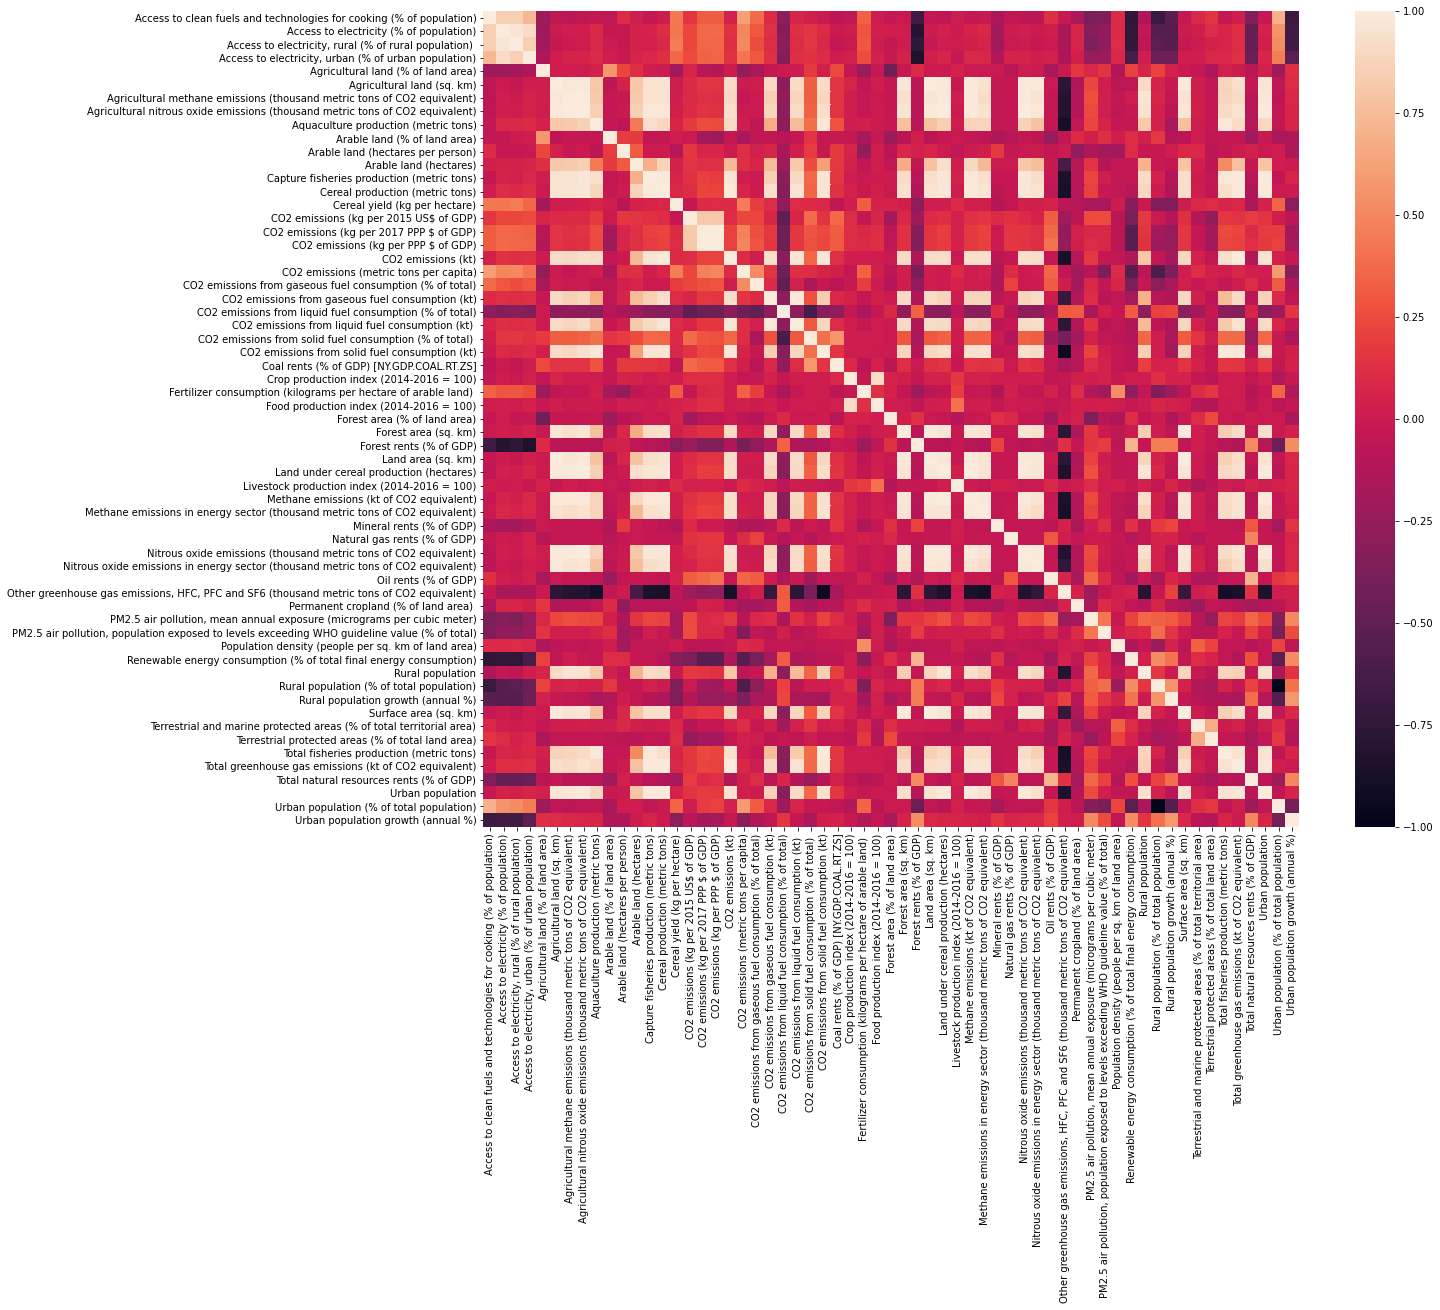

In [6]:
corr_matrix = df_2.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, square=True);
plt.show()

In [7]:
df_3=df_2.copy()
correlated_coeff = set()
correlation_matrix = df_3.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_coeff.add(colname)
print(len(correlated_coeff))
df_3.drop(labels=correlated_coeff, axis=1, inplace=True)
df_3.head()

26


,Country Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Agricultural land (% of land area),Agricultural land (sq. km),Aquaculture production (metric tons),Arable land (% of land area),Arable land (hectares per person),Arable land (hectares),Cereal yield (kg per hectare),...,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)",Population density (people per sq. km of land area),Renewable energy consumption (% of total final energy consumption),Rural population (% of total population),Rural population growth (annual %),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total natural resources rents (% of GDP),Urban population growth (annual %)
0,AFG,32.44,97.70000,58.067580,379100.0,6150.0,11.838679,0.218438,7729000.0,1981.9,...,56.287047,100.000000,54.196961,24.740299,74.980,2.489041,0.104707,0.10,0.677459,3.649128
1,ALB,77.42,99.89000,43.127737,11817.0,4750.0,22.638686,0.215674,620300.0,4716.4,...,18.189934,100.000000,104.967190,39.587299,41.579,-2.505938,13.147749,17.21,1.333387,1.544014
2,DZA,92.62,99.40287,17.365532,413602.0,1376.0,3.108734,0.182588,7404200.0,1020.4,...,39.853274,100.000000,17.025948,0.080200,28.541,-0.066827,7.105500,7.50,12.032482,2.910061
3,ASM,NaN,NaN,24.500000,49.0,20.0,15.000000,0.053822,3000.0,NaN,...,12.382730,100.000000,278.695000,1.721400,12.802,0.196381,8.708522,4.27,0.000000,-0.166518
4,AND,100.00,100.00000,40.042553,188.2,NaN,1.744681,0.010609,820.0,NaN,...,10.255834,17.419558,164.457447,19.255800,11.752,-0.066028,21.190930,21.19,0.000000,-1.009388


***Used derived attributes to exhibit variables that could be more pertinent (relative value, ratio, difference, relative variation, indicator combining several attributes, ...).***


Par la suite, nous souhaitons mettre en avant des variables dont l'étude pourrait être plus pertinente. Il s'agit donc de trouver des relations entre les variables déjà présentes dans le dataset et appliquer les transformations. A partir des noms des colonnes, nous pouvons définir des regroupements, des ratios plus intéressants à analyser. 

Nous envisageons une petite dizaine de variables finales, afin d'expliquer au mieux notre jeu de données. C'est pourquoi nous choississons danc un premier temps, arbitrairement les variables à analyser et vérifions après en utilisant une PCA la qualité de notre sélection.

In [97]:
df_3.columns

Index(['Country Code',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Aquaculture production (metric tons)', 'Arable land (% of land area)',
       'Arable land (hectares per person)', 'Arable land (hectares)',
       'Cereal yield (kg per hectare)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions (kg per 2017 PPP $ of GDP)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from solid fuel consumption (% of total) ',
       'Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]',
       'Crop production index (2014-2016 = 100)',
       'Fertilizer consumption (kilograms per hectare of arable land) ',
       'Forest area (% of land area)', 'Forest rents (% of GD

A partir de nos 36 variables environnementales, nous choississons de garder arbitrairement les variables suivantes afin de concentrer notre étude sur l'impact de la densité de population et de la richesse du pays sur la pollution émise: 
    - Access to electricity (% of population); (2)
    - Agricultural land (% of land area); (3)
    - CO2 emissions (metric tons per capita); (12) 
    - PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total); (27)
    - Renewable energy consumption (% of total final energy consumption); (29)
    - Rural population (% of total population). (30)
    - Urban population growth (annual %) (35)
    
Par la suite, on s'intéressera ainsi à ces 7 variables. Plus particulièrement, on utilisera 'CO2 emissions (metric tons per capita)' comme label pour la partie classification. 

In [9]:
df_classification=df_3.iloc[:, [0,2,3,12,27, 29, 30,35]]
df_classification.head()

,Country Code,Access to electricity (% of population),Agricultural land (% of land area),CO2 emissions (metric tons per capita),"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)",Renewable energy consumption (% of total final energy consumption),Rural population (% of total population),Urban population growth (annual %)
0,AFG,97.70000,58.067580,0.208857,100.000000,24.740299,74.980,3.649128
1,ALB,99.89000,43.127737,1.714126,100.000000,39.587299,41.579,1.544014
2,DZA,99.40287,17.365532,3.535020,100.000000,0.080200,28.541,2.910061
3,ASM,NaN,24.500000,NaN,100.000000,1.721400,12.802,-0.166518
4,AND,100.00000,40.042553,6.080600,17.419558,19.255800,11.752,-1.009388


In [10]:
df_clustering=df_classification

***Choose a subset of the dimensions to focus on some aspects and/or to simplify the interpretations. For methods that use distances, reduce the number of dimensions between 4 and 6, and standardize the data if necessary.***


Afin de trouver un sous-ensemble de variables permettant de simplifier les analyses, on procède à une méthode de réduction de la dimensionnalité. Autrement dit, on cherche à minimiser la perte d'information venant de la suppression de toutes les autres variables en trouvant des axes résumant au maximum l'information. 

Ici, l'utilisation d'une analyse en composantes principales (PCA) permet de vérifier dans notre cas le pourcentage de notre jeu de données réduit (et choisit abitrairement) expliquée et donc de quantifier la pertinence dans notre choix de données. Nous standardisons les données puis effectuons une analyse en composante principale.


In [11]:
#Standardisation 

from sklearn.preprocessing import StandardScaler
variables = df_classification.columns.tolist()[1:7] 
x = df_classification.loc[:, variables].values
y = df_classification.loc[:,['Country Code']].values
x = StandardScaler().fit_transform(x)
x = pds.DataFrame(x)

In [12]:
#Nettoyer le jeu de données, car il y avait un message d'erreur sur les valeurs Na/infinis/trop lourdes
def clean_dataset(df):
    assert isinstance(df, pds.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(x)

,0,1,2,3,4,5
0,0.546744,1.035138,-0.859169,0.411347,-0.150910,1.496799
1,0.633042,0.292370,-0.530722,0.411347,0.381135,0.037822
2,0.613846,-0.988455,-0.133407,0.411347,-1.034610,-0.531686
4,0.637376,0.138983,0.422033,-2.838153,-0.347448,-1.265041
5,-1.656109,0.375120,-0.636859,0.411347,0.718732,-0.212381
...,...,...,...,...,...,...
210,0.613733,-0.639962,0.279837,0.408713,-0.517680,-1.261415
211,0.605852,0.099893,-0.383086,0.411347,0.071648,1.082269
214,-0.587388,0.350344,-0.817360,0.411347,-0.930476,1.043656
215,-1.917137,-0.257692,-0.830201,0.411347,2.029706,0.735969


In [13]:
#PCA

from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pds.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5
0,-0.911091,-1.188430,-0.092116,-1.104712,-0.858013,-0.279778
1,-0.153572,-0.471551,-0.161120,-0.559321,0.414438,-0.543635
2,1.176983,-0.014361,-1.184534,-0.501307,0.411542,0.503868
3,2.069631,0.975881,2.175807,-0.697583,0.209630,0.532856
4,-1.429575,0.163442,0.193525,0.764811,0.713501,0.654263


[0.47552797 0.16979946 0.15649763 0.09424314 0.06778424 0.03614755]


Text(0, 0.5, 'Explained Varience')

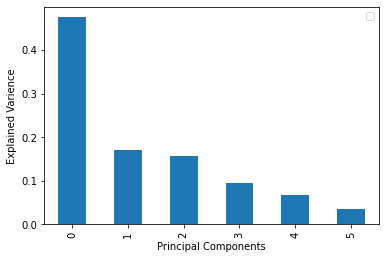

In [14]:
print(pca.explained_variance_ratio_)
pds.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')

D'après notre PCA, les 3 premières composantes principales portent 78% de l'information. Ainsi notre choix de variables semble cohérent, limitant la perte d'informations. Les points abérrants peuvent aussi amener des incohérences et une mauvaise estimation de la variance, on prendra soin de les éliminer dans les parties suivantes.  

## Object selection

***Remove objects containing missing values***

Ensuite, on souhaite clarifier le jeu de données du côté des objets, c'est-à-dire des pays. On supprime donc les lignes contenant au moins 1 valeur NA. Nous nous retrouvons avec 185 pays.

In [58]:
df_c =df_clustering.dropna()
print(" Size of clustering data :" ,df_c.shape)

df_c= df_classification.dropna()
print(" Size of classification data :" ,df_c.shape)

 Size of clustering data : (185, 8)
 Size of classification data : (185, 8)


***Identified the outliers (exceptional objects, noise, ...) in 1D, 2D, n-dimensions. Keep track of them and eventually remove them***

Les points aberrants, c'est à dire les pays présentant les valeurs environnementales divergeant le plus des autres, doivent eux aussi être supprimés. Si cette étape est négligée, cela peut effectivement causer des problèmes lors d'analyses statistiques, en ayant un impact significatif sur la moyenne ou la déviation standard, par exemple. 

Pour se faire, nous calculons le z_score de chaque colonne pour tous les pays, qui indique à quel point le point est éloigné de la moyenne grâce à la formule suivante: Z=(x-mu)/sigma. Nous savons que si la valeur absolue de celui-ci est supérieure à 3, le point est alors considéré comme aberrant. On suppose alors que la distribution des pays pour chaque variable suit une courbe de Gauss. Cependant d'après certains histogrammes, c'est pas le cas pour toutes les variables, notamment pour celles mesurées en pourcentage. Nous utiliserons alors la méthode par DBSCAN pour gérer à la fois les distributions normales et les non-normales.

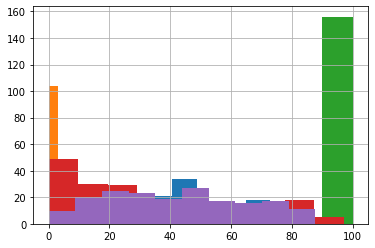

In [19]:
#df_c.iloc[:,1].hist()  # même distribution que l'air pollution en orange
df_c.iloc[:,2].hist()   # Bleu: Arable land (% of land area)
df_c.iloc[:,3].hist()   # Orange: CO2 emissions
df_c.iloc[:,4].hist()   # Vert: PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)
df_c.iloc[:,5].hist()   # Rouge: Renewable energy consumption (% of total final energy consumption)
df_c.iloc[:,6].hist()   # Violet: Urban population growth (annual %)

On observe des distributions très différentes pour nos données, notamment en ce qui concerne l'accès à l'électricité qui quasiment entièrement contenu dans les valeurs supérieurs à 95%. D'un autre coté, les emissions de CO2 sont principalement répartis vers les valeurs proche de 0. I faut ainsi prendre en compte que ces deux variables n'ont pas les mêmes unités (% vs metric ton per capita).

In [59]:
df_6=df_c.drop(['Country Code'], axis=1)
print(df_6.shape)
for col in df_6.columns:
    col_zscore = col + 'z_score'
    df_6[col_zscore]=(df_6[col]-df_6[col].mean())/df_6[col].std()
df_zscore=df_6.iloc[:,6:]

(185, 7)


In [60]:
for col in df_zscore.columns:
    df_zscore['outliers']=(abs(df_zscore[col])>3).astype(int)
df_zscore

,Urban population growth (annual %),Access to electricity (% of population)z_score,Agricultural land (% of land area)z_score,CO2 emissions (metric tons per capita)z_score,"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)z_score",Renewable energy consumption (% of total final energy consumption)z_score,Rural population (% of total population)z_score,Urban population growth (annual %)z_score,outliers
0,3.649128,0.571266,0.892569,-0.808064,0.385979,-0.258666,1.437571,1.017243,0
1,1.544014,0.651613,0.194846,-0.499980,0.385979,0.270964,-0.032038,-0.301666,0
2,2.910061,0.633741,-1.008304,-0.127297,0.385979,-1.138353,-0.605697,0.554199,0
4,-1.009388,0.655649,0.050762,0.393707,-2.749750,-0.454311,-1.344395,-1.901440,0
5,4.480204,-1.479717,0.272578,-0.599536,0.385979,0.607027,-0.284064,1.537935,0
...,...,...,...,...,...,...,...,...,...
210,-0.756978,0.633636,-0.680945,0.260327,0.383438,-0.623770,-1.340744,-1.743298,0
211,3.086316,0.626298,0.014042,-0.361497,0.385979,-0.037118,1.020021,0.664627,0
214,4.256882,-0.484676,0.249304,-0.768847,0.385979,-1.034692,0.981126,1.398017,0
215,4.262052,-1.722749,-0.321858,-0.780892,0.385979,1.912048,0.671197,1.401257,0


In [61]:
print(str(df_zscore.outliers.value_counts()))

0    185
Name: outliers, dtype: int64


Notre jeu de données ne comporterait aucun point aberrant. Nous essayons maintenant avec la technique DBSCAN.

In [62]:
df_7=df_c.drop(['Country Code'], axis=1)

from sklearn.preprocessing import StandardScaler
zscore = StandardScaler().fit(df_7)
X_z = pds.DataFrame(zscore.transform(df_7), index=df_7.index, columns=df_7.columns)
X_z.describe()


from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2)
outliers = dbscan.fit_predict(X_z)
outliers = outliers == -1
X_z[outliers]

,Access to electricity (% of population),Agricultural land (% of land area),CO2 emissions (metric tons per capita),"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)",Renewable energy consumption (% of total final energy consumption),Rural population (% of total population),Urban population growth (annual %)
14,0.657428,-1.307268,3.493804,0.387027,-1.144310,-1.385191,1.214555
106,0.657428,-1.430067,3.808574,0.387027,-1.143549,-1.866523,0.683102
121,0.657428,-0.591088,-0.097828,-3.420460,-1.100915,0.826727,2.197662
148,0.657428,-1.606975,2.333015,0.387027,-1.144250,-1.094451,2.653612
159,0.657428,-1.551182,5.740378,0.387027,-1.144310,-1.823066,0.906419
204,0.657428,-1.571181,3.519748,0.387027,-1.139911,-1.247322,-0.397766
207,0.646392,1.945929,-0.461744,-2.567764,1.011351,-1.652284,-0.984203


On élimine alors les lignes des 7 valeurs aberrantes trouvées. 

In [63]:
df_c= df_c.drop([14,106,121,148,159,204,207], axis=0)

## Clustering: Look for clusters of globular shapes and of arbitrary shapes, using in particular K-means, hierarchical complete/single and DBSCAN.

Après avoir sélectionné les pays et les variables constituant notre jeu de données final, nous nous attaquons à l'étape de clustering. 

In [24]:
classes = df_c['Country Code']
objects = df_c.drop(['Country Code'], axis=1)

***Compute dendrograms for hierarchical clustering.***

Les clusters hierachisés s'avèrent pratique car nous n'avons pas à fixer de nombre de clusters.
En fonction du niveau du dendogramme qu'on choisit, on peut obtenir le nombre de clusters le plus approprié à l'étude.  


In [25]:
# Perform a hierarchical clustering: compute the aggregation tree (but not the clusters)
Z = sch.linkage(objects, method='complete', metric='euclidean')

In [26]:
# Z is an array containg information about the grouping made
print(type(Z))
print(Z.shape)

<class 'numpy.ndarray'>
(184, 4)


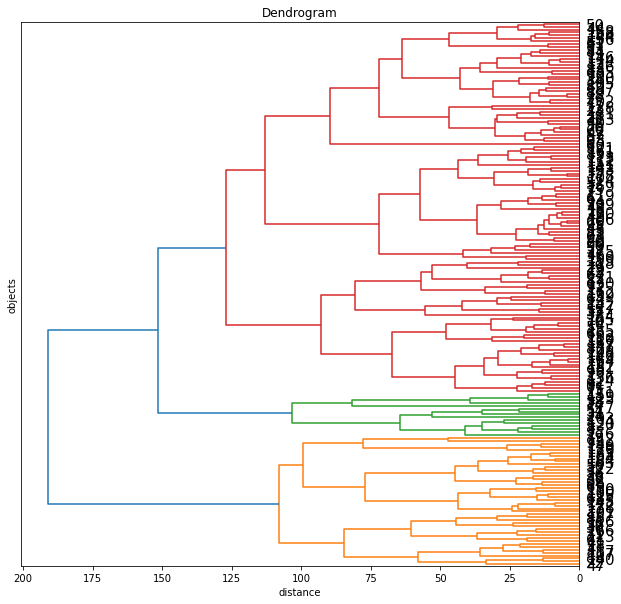

In [27]:
#Draw the dendrogram using Z
fig = plt.figure(figsize=(10, 10))  #" 20,40"
dendro = sch.dendrogram(Z, orientation='left', leaf_rotation=0, leaf_font_size=15)
# in blue: nodes with a merging distance >= 0.7 * maximal merging distance

plt.title('Dendrogram')
plt.ylabel('objects')
plt.xlabel('distance');

Ce dendogramme étant compliqué à lire car le nombre de pays est très grand, nous cherchons à la simplifier en ne montrant que la partie haute de l'arbre. 

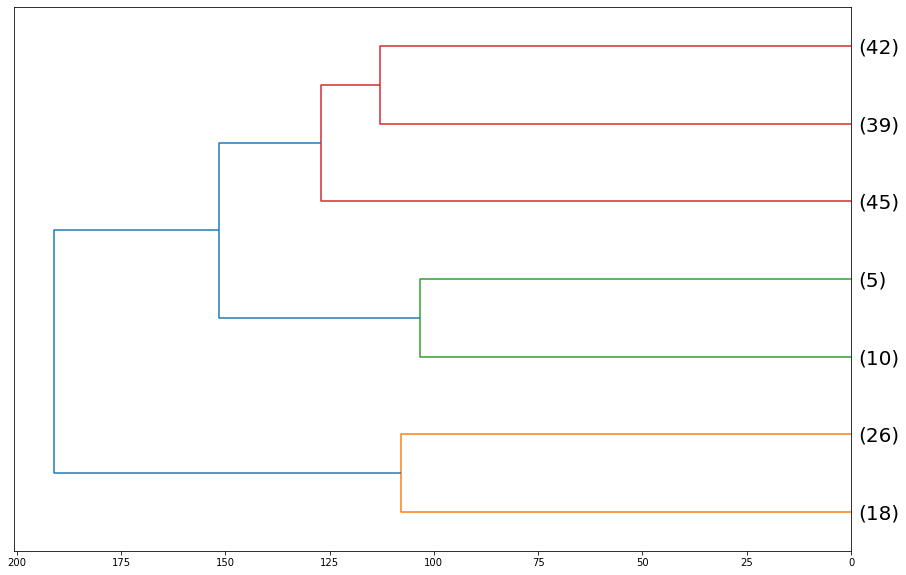

In [28]:
# View only the upper part of the tree, setting p= number of non-singleton branches
fig = plt.figure(figsize=(15, 10))
dendro = sch.dendrogram(Z, orientation='left', p=7, truncate_mode='lastp',
                        show_leaf_counts=True, leaf_rotation=0, leaf_font_size=20)

Ainsi la partie haute de l'arbre, nous donne déjà des informations sur certains clusters possibles. On observe une branche ne contenant que 5 pays, face à une branche en contenant 45. Nous pourrions regarder plus précisément quels pays sont rassemblés et quels critères les rapprochent. Par ailleurs, ce dendogramme nous donne comme première indication 3 clusters (bleu, vert, orange). 


***Determine good candidates for the number of clusters (using SSE, silhouette coefficient and grouping distance curves).***


Dans un premier temps, on trace la grouping distance curves. 

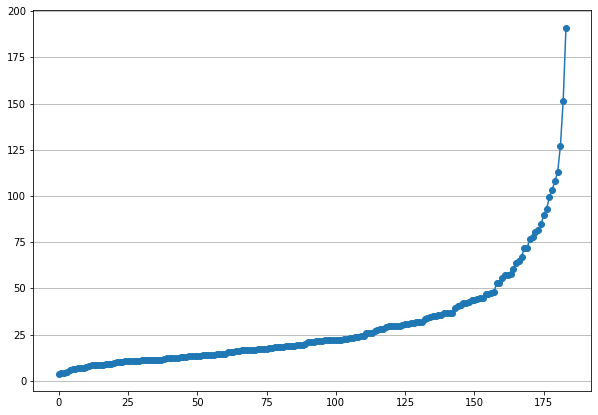

In [29]:
# Draw the grouping distance curve using the grouping distances in Z
fig = plt.figure(figsize=(10, 7))
plt.plot(Z[:,2],'o-')
plt.grid(axis='y')

La distance commence a 0 et évolue doucement car on projette de proche en proche. On observe une augmentation soudaine car on fusionne des clusters de plus en plus éloignés. A partir de l'iteration 130, on fusionne des clusters très éloignés, cela peut être un indice pour choisir le nombre de clusters final. On choisi un seuil de distance de 150 environ.

In [30]:
# Another way to compute clusters is by cutting the dendrogram at a given distance level
distance_threshold = 150  # cutting distance in the dendrogram
clusters_distance_based = sch.fcluster(Z, distance_threshold, criterion='distance')
print(clusters_distance_based)

# Compute the cluster labels by cutting the dendrogram in order to obtain a given number of clusters
#nb_clust = 4 # number of clusters
#clusters = sch.fcluster(Z, nb_clust, criterion='maxclust')
#print(clusters)

[3 3 3 2 1 3 3 3 2 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 2 3 1 1 3 3 1 2 1 1 3 3 3
 3 1 1 3 1 3 3 3 3 3 1 3 3 3 3 3 3 2 3 1 3 2 3 3 1 3 3 3 3 3 3 1 1 3 1 3 3
 2 3 3 3 3 2 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 1 1 3 3 3 1 1 3 2 1 3 3 1 3 3 3
 3 3 3 3 1 1 1 3 3 2 3 1 1 3 2 3 3 3 1 3 3 3 3 2 3 3 3 1 3 1 3 3 3 3 1 3 3
 3 1 1 3 1 3 3 3 3 1 3 2 3 3 3 1 3 3 1 3 3 3 3 3 1 3 3 3 2 2 3 1 3 3 3 1 1]


Ainsi en coupant notre dendogramme à notre distance 150, on trouve 3 clusters. 

***Utilisation de la methode Kmeans pour trouver des clusters de forme globulaire***

Dans un second temps, nous souhaitons appliquer la méthode Kmeans afin de pouvoir trouver des clusters de forme globulaire adéquats pour expliquer notre jeu de données. Au vu des résultats de l'analyse hiérarchique, nous pouvons directement partir sur une analyse Kmeans avec 3 clusters. 

In [31]:
km=KMeans(n_clusters=3) # Avant 8, maintenant 5 create a KMeans object
km.fit(objects) # compute the clusters
centroids=km.cluster_centers_ # get the cluster centers
print(centroids)

[[95.26408384 37.65165104  5.01096125 97.27140396 17.91232076 36.78386667
   1.50480532]
 [41.75593127 44.32202055  0.45319575 99.99990403 69.07109545 64.49812766
   3.65990214]
 [99.98333333 33.63660773  8.13479769 13.71842816 29.03297206 21.186
   1.22923216]]


In [32]:
clusters = km.labels_ # get cluster labels for all objects
#clusters = km.predict(other_objects) # get closest center for objects in dataframe or numpy array other_objects

print(type(clusters))
print(clusters)
print("Taille de la variable clusters : ",clusters.shape)

<class 'numpy.ndarray'>
[0 0 0 2 1 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 2 0 1 1 0 1 1 2 1 1 0 0 0
 1 1 1 0 1 0 0 0 0 2 0 0 0 0 0 0 0 2 1 1 0 2 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0
 2 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 2 1 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 2 0 1 1 0 2 0 1 0 1 0 0 0 0 2 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 1 1 0 1 2 0 0 0 1 0 2 2 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 2 0 1 0 0 0 1 1]
Taille de la variable clusters :  (185,)


L'enjeu est maintenant de représenter ces clusters formé afin de pouvoir tirer quelques conclusions. Pour cela, nous utilisons les fonctions suivantes. Nous allons particulièrement nous intéresser aux variables "renewable ernegie" et "agricultural land".

C:\Users\Albane FLOCON\anaconda3\lib\site-packages\seaborn\axisgrid.py:1342: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=layout_pad)
C:\Users\Albane FLOCON\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Albane FLOCON\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


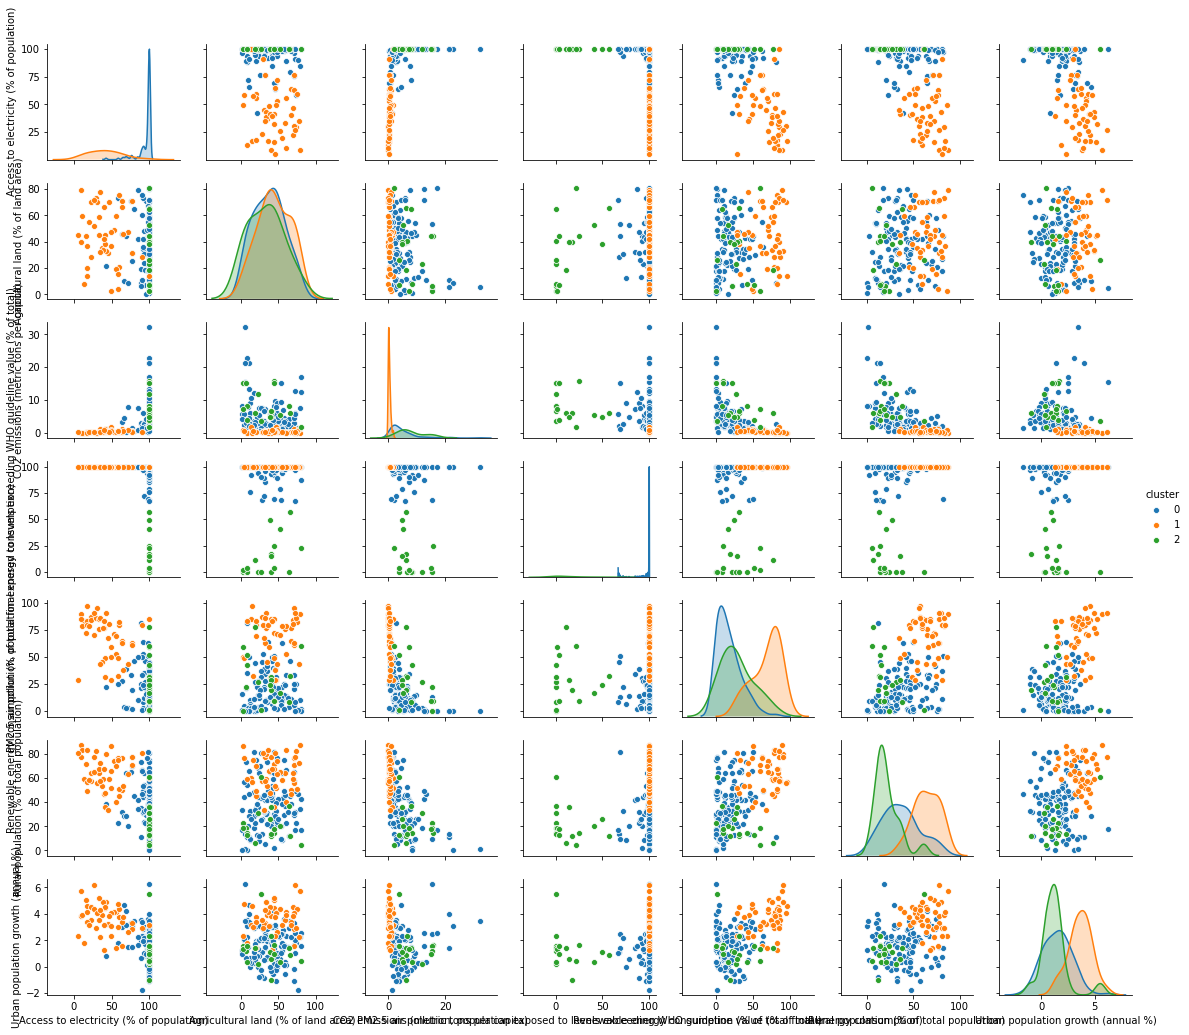

In [33]:
# View clusters in all 2D projections (including also 'species' dimension)
df_c2 = df_c.copy()
df_c2[('cluster')] = clusters
#df_c2[('class')] = classes.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
sns.pairplot(data=df_c2, hue='cluster')

Ces graphiques nous montrent particulièrement l'exentricité du cluster 0 (bleu). L'objectif est maintenant de déterminer quels sont les pays à rapprocher et comment les variables interviennent dans ce rapprochement. 

- Access to electricity (% of population); (2)
- Agricultural land (% of land area); (3)
- CO2 emissions (metric tons per capita); (12) 
- PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total); (27)
- Renewable energy consumption (% of total final energy consumption); (29)
- Rural population (% of total population). (30)
- Urban population growth (annual %) (35)

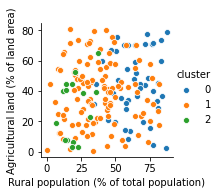

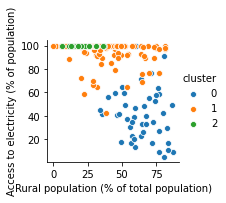

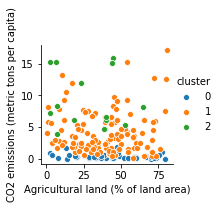

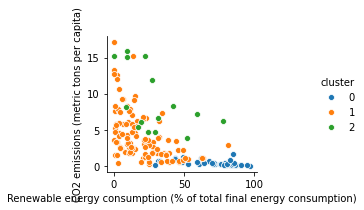

In [144]:
sns.pairplot(data=df_c2, hue='cluster',x_vars="Rural population (% of total population)", y_vars="Agricultural land (% of land area)")
sns.pairplot(data=df_c2, hue='cluster',x_vars="Rural population (% of total population)", y_vars="Access to electricity (% of population)")
sns.pairplot(data=df_c2, hue='cluster',x_vars="Agricultural land (% of land area)", y_vars="CO2 emissions (metric tons per capita)")
sns.pairplot(data=df_c2, hue='cluster',x_vars="Renewable energy consumption (% of total final energy consumption)", y_vars="CO2 emissions (metric tons per capita)")


Ces derniers graphes montrent des clusters très peu visiblement différents. Ils sont très liés les uns aux autres. Cependant sur le graphique représentant l'accès à l'électricité en fonction de la population rurale, on observe deux clusters proches (1 et 2) qui font face à un cluster bleu. L'interprétation lié à ce graphique est que plus on augmente le pourcentage de population rurale, plus on trouve des pays ayant un accès à l'electricité moins direct. D'après les autres graphiques, ces pays bleu sont aussi ceux qui aurait le moins d'émissions de CO2 et utiliserait le plus des énergies renouvelables. Au contraire, les quelques pays en vert seraient des pays (très) pollueurs et plus urbanisés. On pourrait hypothétiser sur le fait que les pays du cluster bleu sont parmis les plus pauvres et les moins industrialisé du monde alors que les pays en vert seraient les grandes "puissances" mondiales économiques et industrielles. Cette hypothèse sera à vérifier si dessous, en trouvant des pays principaux dans chaque cluster.  

Afin de vérifier notre clustering, on calcul la SSE. Il s'agit de la somme des écarts au carré, un écart étant la distance entre chaque point d'un même cluster et le centroïde du cluster le plus proche. Baisser la dispersion des points revient à baisser la SSE pour trouver le nombre de clusters optimal.

Pour bien avoir la vue maximale, on peut tracer la SSE en fonction du nombre de clusters. 

In [126]:
# SSE 
sse = km.inertia_
print("sse = ",sse)

sse =  228236.155065521


[333137.35270304105, 228236.155065521, 189445.77228741086, 163664.71450101427, 142816.52295705467, 130511.34955681486, 120057.58952215537, 112903.88664642235, 105221.17331204544]


Text(0, 0.5, 'SSE')

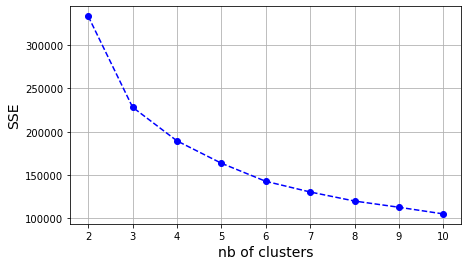

In [127]:
# Get SSE when varying the number of clusters
sse_list = []
k_list = range(2,11)
for i in k_list:
    km_i_clusters=KMeans(n_clusters=i)
    km_i_clusters.fit(objects)
    sse_list = sse_list + [km_i_clusters.inertia_]
print(sse_list)

fig = plt.figure(figsize=(7, 4))
plt.plot(k_list,sse_list,'bo--')
plt.grid()
plt.xlabel("nb of clusters",fontsize=14)
plt.ylabel("SSE",fontsize=14)

Au vu de cette courbe, l'utilisaiton de 3 clusters nous parait adéquate. 

Dans un troisième temps, on s'intéresse au silhouette coeficient. Cette valeur permet de répondre à la question suivante: les point présents dans ce cluster sont-ils plus similaires à ce cluster ou au cluster le plus proche ?
Un score proche de 1 indique un bon clustering, tandis qu'un score proche de -1 indique un mauvais clustering.

In [128]:
#Average silhouette coefficient
clusters = km.labels_ # get cluster labels for all objects
metrics.silhouette_score(objects.values, clusters, metric='euclidean', sample_size=None) # sample_size=None for no sampling 

0.44723491089483725

0.45 est un score acceptable. Nous gardons donc 3 clusters pour ce jeu de données.

***Study the stability of the K-means convergence.***

On souhaite représenter l'évolution de la stabilité en fonction du nombre de clusters. 
En guise de premier exemple, on calcule la stabilité grâce à la déviation standard du silhouette coefficient.

In [129]:
def compute_stability(km,df,iterations=100):
    avg_silhouette_coef = []
    sse_list = []
    for i in range(100):
        km.fit(df)
        labels = km.predict(df)
        avg_silhouette_coef.append(silhouette_score(df, labels,metric='euclidean'))
    avg_silhouette_coef = np.asarray(avg_silhouette_coef)
    return(avg_silhouette_coef.std())

In [130]:
stability = []
Ks = range(2,30)
for k in Ks:
    km_2 = KMeans(n_clusters=k,init='random',n_init=1) # create a KMeans object
    stability.append(compute_stability(km_2,df_c.drop(['Country Code'], axis=1)))
    # compute_stability(km_2,df_4.drop(['Time','Time Code','Country Name','Country Code'], axis = 1))

Text(0, 0.5, 'Instability: std(Avg. Silhouette Coef. 100 iterations)')

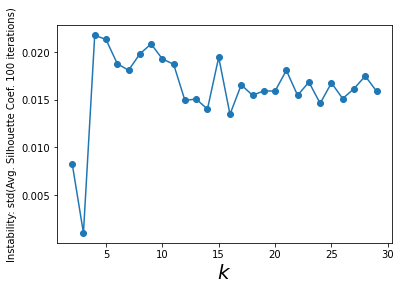

In [131]:
plt.plot(Ks,stability,"o-")
plt.xlabel("$k$",fontsize=20)
plt.ylabel("Instability: std(Avg. Silhouette Coef. 100 iterations)")

Selon cette courbe de stabilité, on a qu'à partir de 4-5 clusters on ne gagne pas plus d'informations. Sachant qu'il faut faire des compromis, le découpage par 3 clusters semble adéquat. 

En guise de second exemple, on calcule la stabilité grâce à la déviation standard de la SSE.

In [132]:
def compute_sse_std(df,iterations=100):
    sse_list = []
    for i in range(iterations):
        km = KMeans(n_clusters=k,init='random',n_init=1) # create a KMeans object
        km.fit(df)
        labels = km.predict(df)
        sse_list.append(km.inertia_)
    return(np.asarray(sse_list).std())

stability = []
Ks = range(2,30)
for k in Ks:
    stability.append(compute_sse_std(df_c.drop(['Country Code'], axis = 1),10))

Text(0, 0.5, 'Instability: std(SSE)')

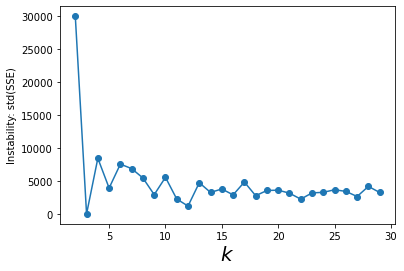

In [133]:
plt.plot(Ks,stability,"o-")
plt.xlabel("$k$",fontsize=20)
plt.ylabel("Instability: std(SSE)")

Avec 3 clusters jusqu'à 30, les points se rapprochent bien du centroïde. Avec 2 clusters on est trop éloigné. 

***Compare (using entropy or mutual entropy, and contingency tables) the content of the clusters to a known labelling or to the result of another clustering.***

Les tables de contingences permettent d'avoir une vue globale de la distribution de chacun des pays dans les différents clusters. Voici la table de contingence pour 3 clusters:

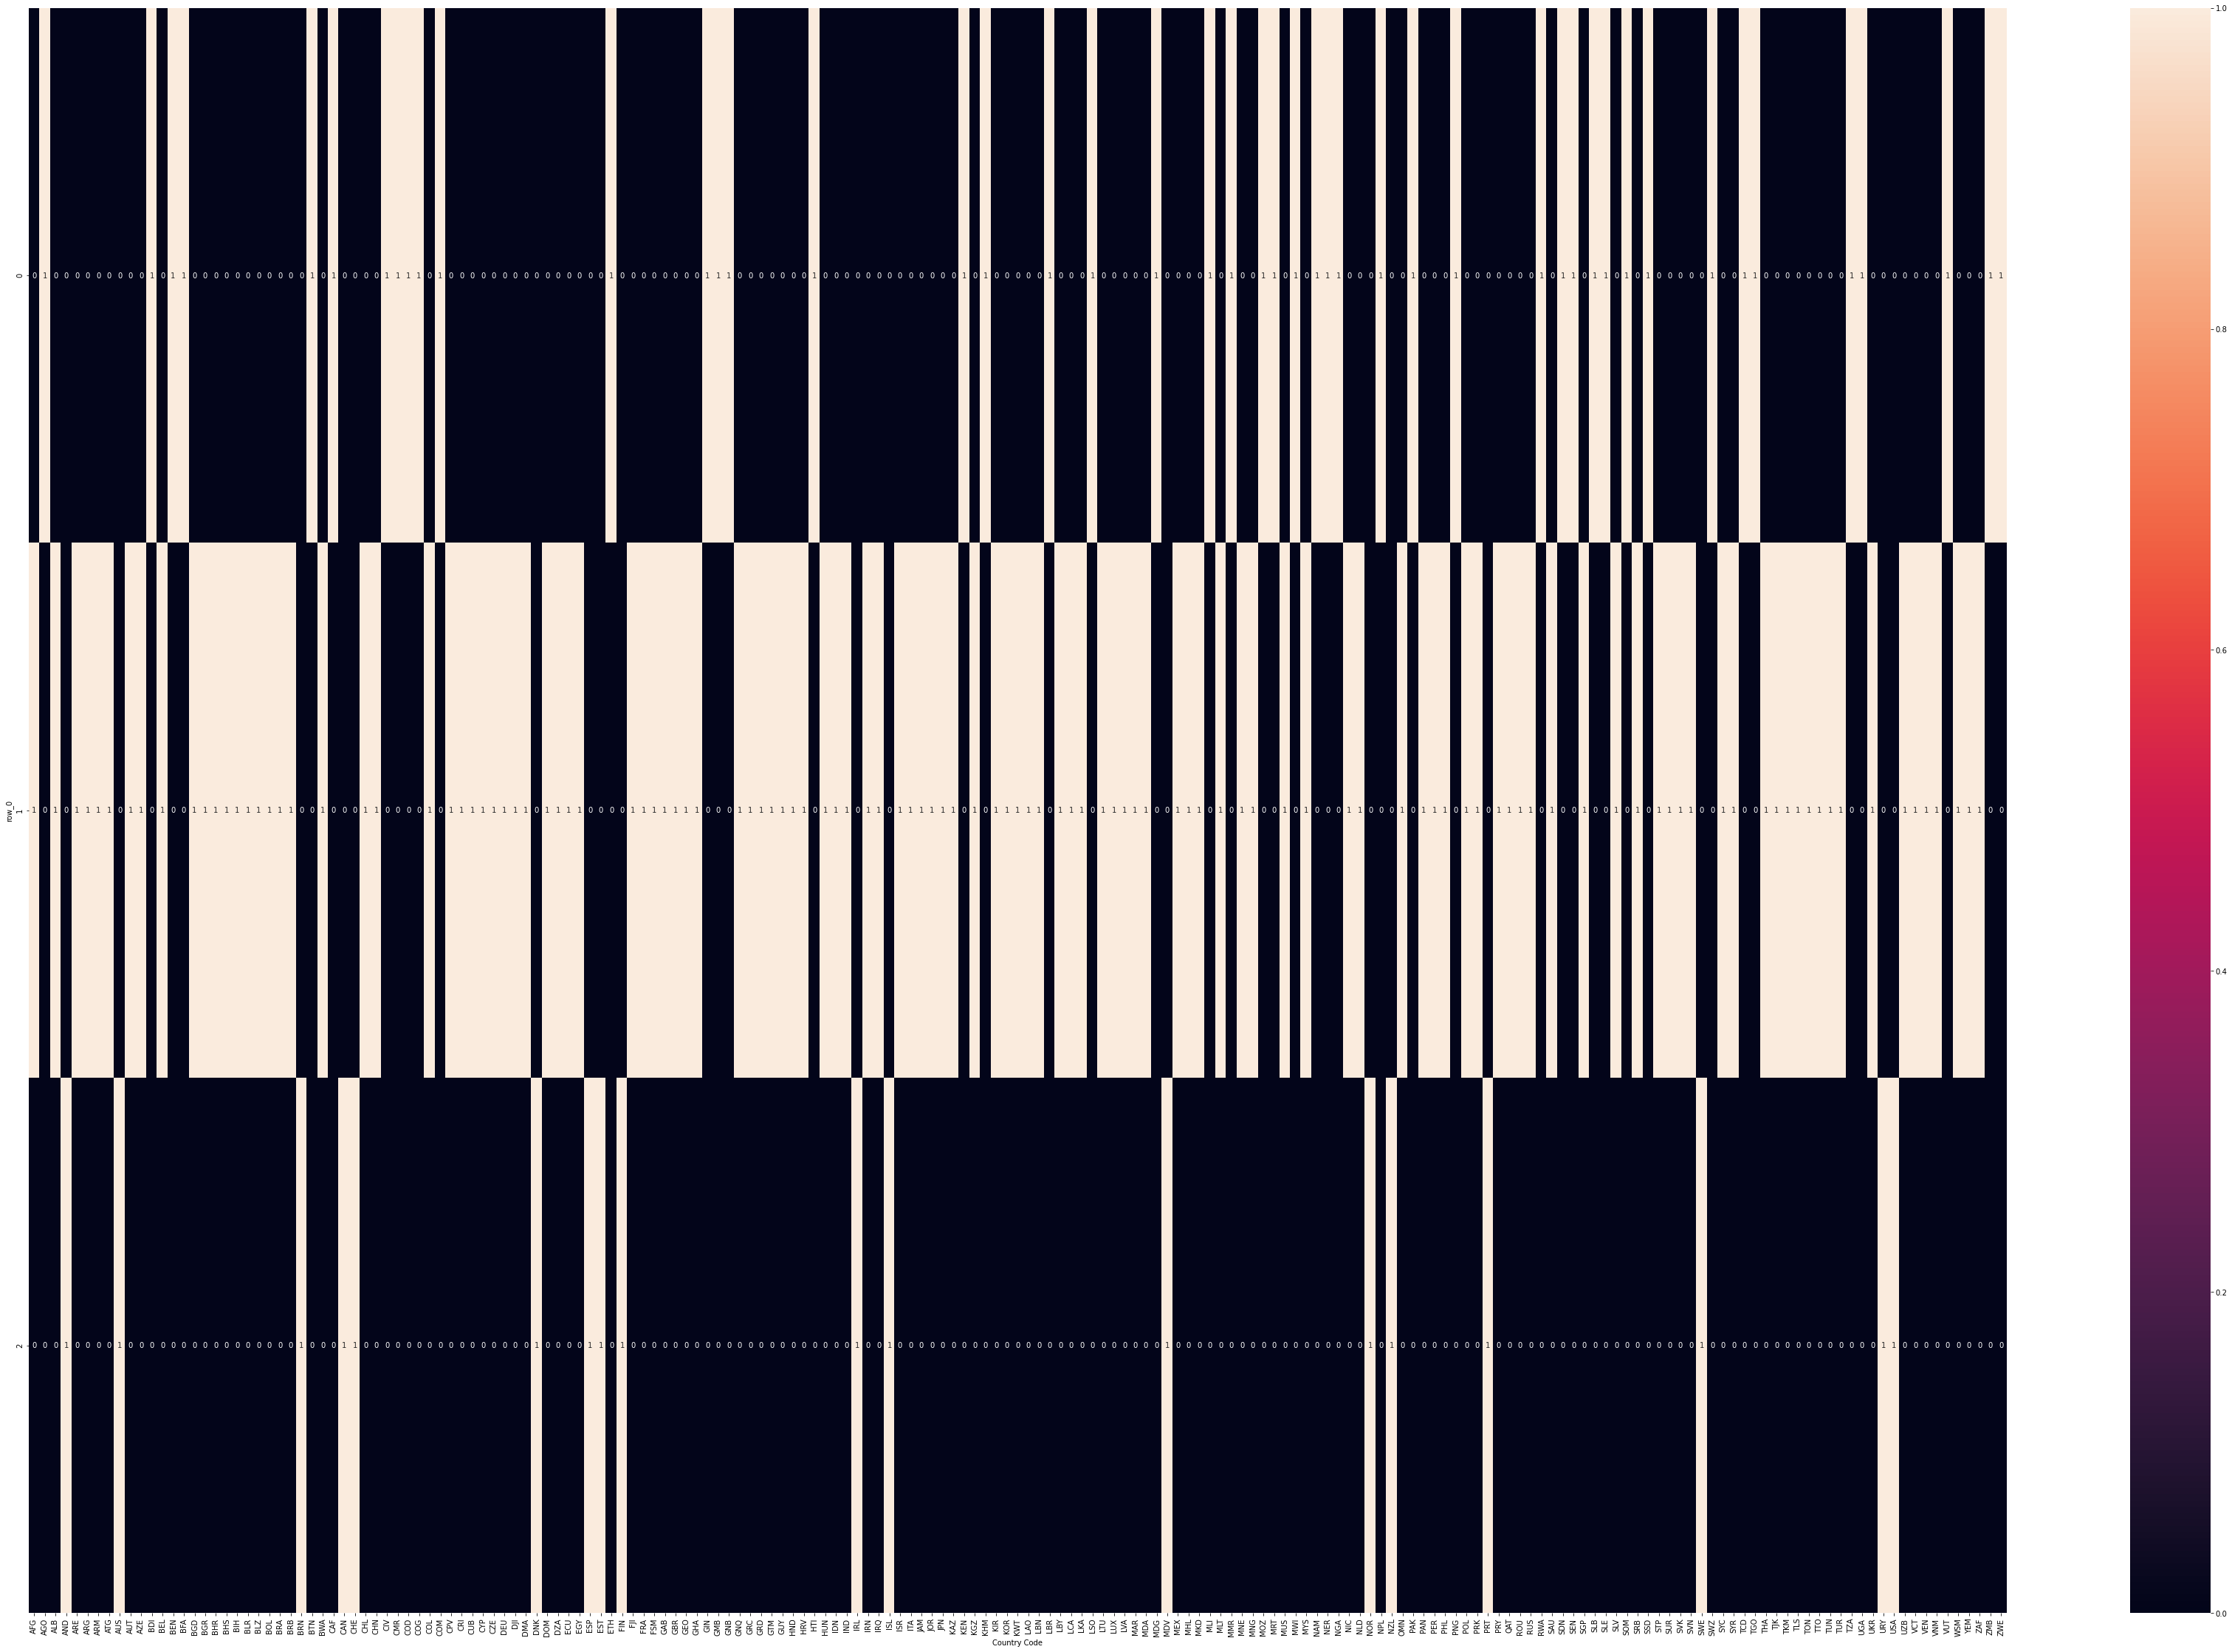

In [34]:
# Contingency table of Country Code vs cluster labels, needed to compute entropy
km_3=KMeans(n_clusters=3) # create a KMeans object  # 3
km_3.fit(objects) # compute the clusters

clusters_3 = km_3.labels_ # get cluster labels for all objects
crosstab_3 = pds.crosstab(clusters_3,classes)
plt.figure(figsize=(60, 40))
sns.heatmap(crosstab_3, annot=True)

L'analyse en détail de cette matrice sera effectuée en conclusion, cependant ces résultats concordent avec notre hypothèse: un cluster contenant peu de pays plutôt riche et industrialisé (2=vert) face à un cluster contenant des pays plus pauvres et moins développés (0=bleu). Au centre, le dernier cluster semble être l'interface entre ces deux extrémités et doit regrouper les pays restants, n'ayant pas de grand extrémité de valeurs pour les variables étudiées.  

Le calcul de l'entropie permet de générer... nous ne sommes pas sûres de cette définition :  si nous avons bien compris, l'entropie décrit la probabilité qu'on a de tomber dans le cluster numéro x si on choisi le pays y? Mais ici on n'a pas des pourcentages?

In [135]:
# entropy
proba = crosstab_3.values/crosstab_3.values.sum(axis=1, keepdims=True) # divide each element of a row by the sum of the row
entropy = [stats.entropy(row, base=2) for row in proba]
print("entropy of each cluster: ", entropy)

entropy of each cluster:  [5.523561956057012, 6.870364719583405, 3.9068905956085187]


***Describe the envelope (the borders) of the clusters using a decision tree (on a dataset having at least 4 dimensions)***

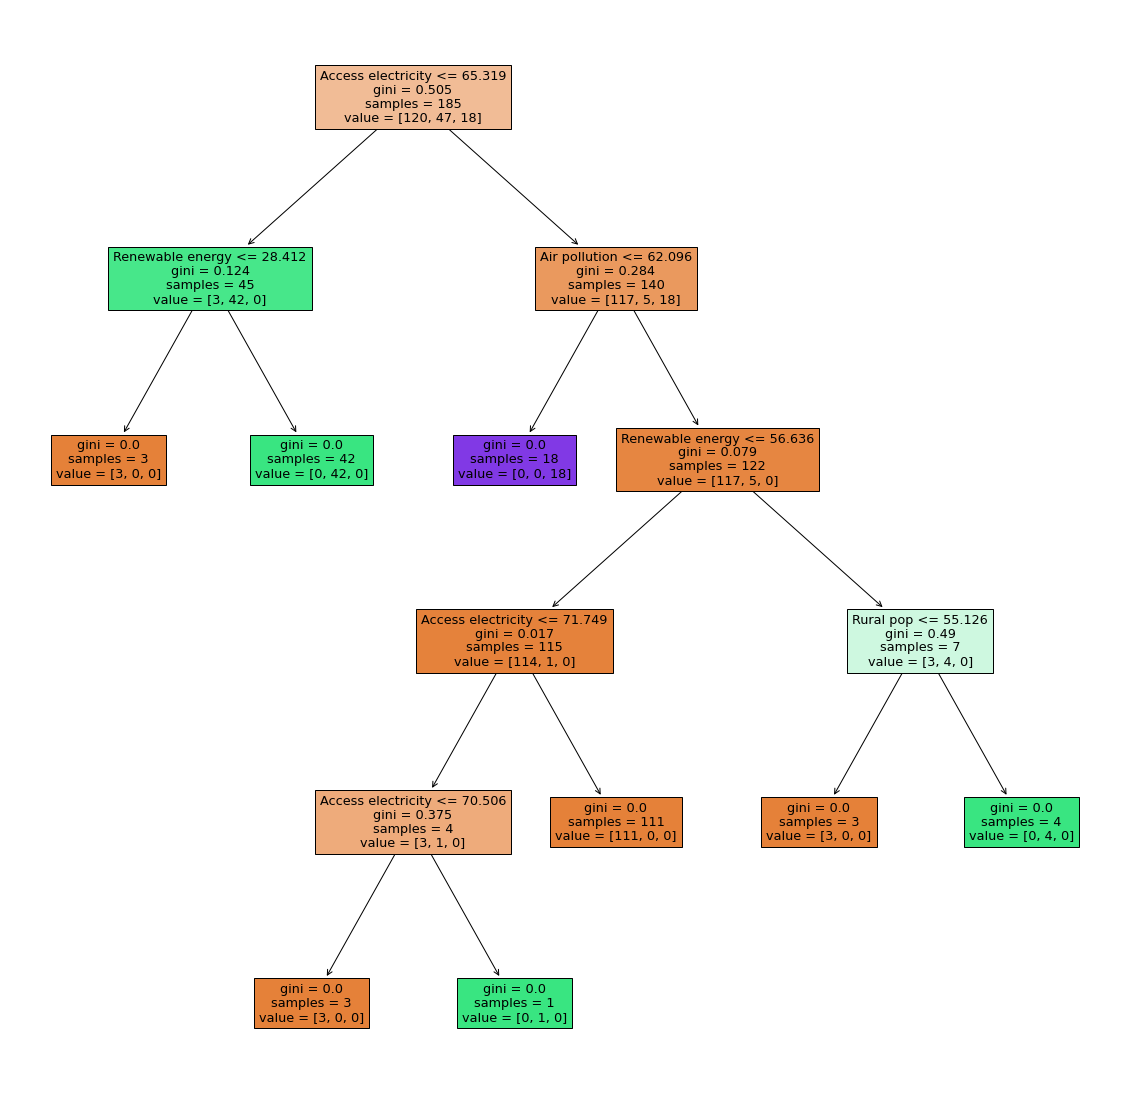

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

km = KMeans(3)
cluster_memberships = km.fit_predict(objects)

cluster_memberships = cluster_memberships.astype(str)
cluster_memberships

dt = DecisionTreeClassifier()
dt.fit(objects,cluster_memberships)

feature_names = list(['Access electricity', 'Agri land', 'CO2 emission', 'Air pollution', 'Renewable energy', 'Rural pop', 'Urban pop growth'])

plt.figure(figsize=(20,20))
try:
    from sklearn.tree import plot_tree
    _=plot_tree(dt,filled=True, feature_names=feature_names)
except ImportError:
    pass

Sur cet arbre, l'apparition du troisième cluster (voilet), celui des pays riches et développés, est très directe, après simplement deux choix sur l'accès à l'électricité et le taux de pollution de l'air. D'un autre côté, le cluster des pays les moins industrialisé (en vert) est en parti formé dès 2 critères, cependant il associe aussi plusieurs classifications, dont certains (5) sont réassociés après le test de différents critères. On peut conclure que le bord entre le cluster 1 (vert) et 2 (orange) est complexe et flou. Au contraire, les bords du cluster 3 (voilet) sont particulièrement intacts et clairs.

**Conclusions sur le clustering**

Le cluster contenant le moins de pays (2, vert) regroupe les pays nordiques (Finlande, Icelande, Norvège, Suède, Estonie, Canada...) et des pays (très) développés (USA, Suisse, Australie, Nouvelle-Zélande...). Les pays de ce groupe étant riche, la totalité de leur population a accès à l'électricité. Il font également partis des plus pollueurs (tous au moins 5 metric tonnes per capita). Moins d'un quart de leur population vit en zone rural. La plupart de ces pays, utilisent moins de 50% d'énergie renouvelable.  

Le cluster le plus en marge des autres (0, bleu) regroupe les pays les moins développés et les plus pauvres du globe. Parmis ceux-là, nous retrouvons un grand nombre de pays du continent africain (Burundi, Nigeria, Congo, Namibie, Gambie...) ainsi que des pays plus isolés (Haïti...). Ces pays sont ceux qui polluent le moins, notamment car ils ont un accès limité aux énérgies fossiles, et qu'il ne sont pas industrialisés. La population est majoritairement rurale. Enfin, il s'agit des pays ayant le moins accès à l'éléctricité: rarement plus de 60% de la population a accès à l'électricité.

Le cluster contenant le plus de payx (1, orange) regroupe tous les pays aux situations intermédiaires. On retrouve notamment le reste des pays développés (Allemagne, Japon, Danemark,France...) et les pays de l'Europe de l'est. 

Notre clustering s'avère efficace puisqu'il nous permet de mettre en avant les constraste de développement des différents pays du monde en se basant sur leurs variables environnementales. 

## Classification

L'objectif de cette partie est de trouver une bonne classification de nos données. Pour cela, nous construisons tout d'abord un label par discrétisation d'un attribut (ce label peut être construit en  clusterisant les données de cet attribut). Compte tenu de notre jeu de données, nous discrétiseront 'CO2 emission (metric tons per capita)' avec objectif de montrer comment les pays en fonction de leur rejet en CO2 sont organisés. On souhaite discrétiser notre features en 4 sous catégories: 'low emission', 'medium emission' et 'high emission'. Nous utiliserons ensuite ce label comme class label.

On regarde dans un premier temps la courbe de distribution de notre variable 'CO2 emissions'. Une transformation logarithmique est envisagée. 

(array([ 1.,  2.,  2.,  3.,  4.,  6.,  7.,  7.,  9., 10., 12., 15., 18.,
        18., 19., 25., 11., 10.,  4.,  2.]),
 array([-3.64406906, -3.28837915, -2.93268923, -2.57699932, -2.2213094 ,
        -1.86561949, -1.50992957, -1.15423966, -0.79854974, -0.44285983,
        -0.08716991,  0.26852   ,  0.62420991,  0.97989983,  1.33558974,
         1.69127966,  2.04696957,  2.40265949,  2.7583494 ,  3.11403932,
         3.46972923]),
 <a list of 20 Patch objects>)

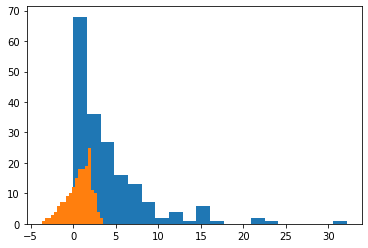

In [94]:
plt.hist(df_c['CO2 emissions (metric tons per capita)'], bins=20)
plt.hist(np.log(df_c['CO2 emissions (metric tons per capita)']), bins=20)

Cette transformation logarithmique ne sera pas utilisée, au profit d'un découpage par quartile de notre variable, impliquant les mêmes résultats que sous transformation log. 

In [95]:
y=df_c['CO2 emissions (metric tons per capita)']
class_labels=['Low', 'Medium', 'High']
y=pds.qcut(y, 3, labels=class_labels)
print(y.groupby(y).size())

CO2 emissions (metric tons per capita)
Low       62
Medium    61
High      62
Name: CO2 emissions (metric tons per capita), dtype: int64


In [96]:
X = df_c.copy()
del X['CO2 emissions (metric tons per capita)']
X.index=X['Country Code']
del X['Country Code']
X.head()

#from sklearn.preprocessing import StandardScaler
#zscore = StandardScaler().fit(X)
#X = pds.DataFrame(zscore.transform(X), index=X.index, columns=X.columns)

,Access to electricity (% of population),Agricultural land (% of land area),"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)",Renewable energy consumption (% of total final energy consumption),Rural population (% of total population),Urban population growth (annual %)
Country Code,,,,,,
AFG,97.700000,58.067580,100.000000,24.740299,74.980,3.649128
ALB,99.890000,43.127737,100.000000,39.587299,41.579,1.544014
DZA,99.402870,17.365532,100.000000,0.080200,28.541,2.910061
AND,100.000000,40.042553,17.419558,19.255800,11.752,-1.009388
AGO,41.797379,44.792155,100.000000,49.008099,35.851,4.480204


Appliquons tout d'abord la méthode "Decision trees". Générons dans un premier temps un train et un test set, partageant le jeu de données en respectivement 2/3 et 1/3.

In [78]:
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier

In [98]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.33, random_state=20)
y_test.head()

73     High
206    High
53     High
32      Low
202     Low
Name: CO2 emissions (metric tons per capita), dtype: category
Categories (3, object): [Low < Medium < High]

Dans un deuxième temps, on entraine un Decision Tree Classifier sur notre jeu d'entrainement train set en utilisant la méthode fit:

In [99]:
clf = DecisionTreeClassifier(random_state=20)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=20)

On prédit ensuite notre jeu de test par notre arbre.

In [100]:
y_predict=clf.predict(X_test)

Evaluation de notre arbre de decision en calculant différente métriques d'évaluations telle que la matrice de confusion et l'accuracy.

In [101]:
pds.crosstab(y_test,y_predict)

col_0,High,Low,Medium
CO2 emissions (metric tons per capita),,,
Low,0,17,3
Medium,5,4,9
High,19,1,4


In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.7258064516129032

Le score d'accuracy de notre modèle est égal à 0,72. Il est bon, cependant il pourrait être amélioré par cross_validation. La matrice de confusion nous donne que notre modèle donne les bonnes solutions pour 45 pays sur 58 pays testés. Là où notre modèle a rencontré des problèmes d'association, est la classe Médium. C'est cette classe qui est la plus difficile a associé, le modèle proposant surtout du High que du Low lors d'un misplacement. C'est un résultat logique, sachant que les scores liés à un taux médium d'émission de CO2 sont compris entre les low et les high, et donc si le pays propose des indicateurs proche des limites des classes 'High', 'medium and 'low', la définition de notre label n'est pas assez précise. Peut être un système de taux pour discrétiser la variable 'émission de CO2' aurait été plus apte pour la classification, cependant ces taux sont difficile à mettre en place arbitrairement.

Nous calculons maintenant de la précision du modèle, au travers d'autres indicateurs.

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        High       0.79      0.79      0.79        24
         Low       0.77      0.85      0.81        20
      Medium       0.56      0.50      0.53        18

    accuracy                           0.73        62
   macro avg       0.71      0.71      0.71        62
weighted avg       0.72      0.73      0.72        62



D'après ces données, on voit que la précision pour la classe 'Medium' est faible face aux classes 'High' et 'Low'. Ce qui vérifie notre hypothèse sur les erreurs de classification sont surtout liés à la frontière entre les émissions de CO2 de la classe 'medium'. 

F-measure nous indique la précision de notre classificateur (combien d'instances il classifie correctement), ainsi que sa robustesse (il ne manque pas un nombre important d'instances). Le score F1 peut être interprété comme une moyenne harmonique de la précision et du rappel, où un score F1 atteint sa meilleure valeur à 1 et son pire score à 0. Dans notre cas, F1-score est plutôt faible pour la classe 'medium', cependant sur l'ensemble du jeu, il monte à 0.73. Ainsi on peut conclure que notre arbre est un bon compromis entre précision et robustesse sur notre jeu de données. Des améliorations doivent tout de même être apportées.  

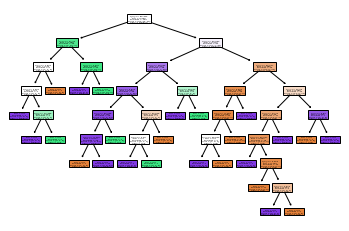

In [104]:
try:
    from sklearn.tree import plot_tree
    _=plot_tree(clf,filled=True,class_names=clf.classes_)
except ImportError:
    pass

L'arbre de classification obtenu est très illisible. On distingue cependant différentes classes qui sont mises en valeur. L'utilisation de la cross-validation est nécessaire afin de déterminer le nombre de leafs suffisantes pour expliquer le modèle et de simplifier visuellement notre arbre. 

***Modele evaluation with Cross validation***

In [86]:
from sklearn.model_selection import StratifiedKFold #cross-validation splitter
from sklearn.model_selection import cross_validate #cross-validation evaluation of metrics

On créé d'abord un stratified cross-validation splitter afin de diviser le modèle en 5 sets de jeu égaux. Nous choissons 5 splits afin d'avoir à chaque fois un jeu de test de (187/5=) 35 valeurs, assez conséquent pour mener une étude. 

In [105]:
# Stratified cross validation splitter:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

#from sklearn.model_selection import KFold
#cv = KFold(n_splits=5, shuffle=True)

#from sklearn.model_selection import ShuffleSplit
#cv = ShuffleSplit(n_splits=100, test_size=0.1)

In [106]:
# On désire avoir les résultats des moyennes de toutes ces mesures de précisions:
scoring = ['accuracy',
           'precision_macro',
           'precision_weighted',
           'recall_macro',
           'recall_weighted',
           'f1_macro',
           'f1_weighted']

scores_clf = cross_validate(clf, X, y, scoring=scoring,
                        cv=cv, return_train_score=True)

In [107]:
pds.DataFrame(scores_clf)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_precision_weighted,train_precision_weighted,test_recall_macro,train_recall_macro,test_recall_weighted,train_recall_weighted,test_f1_macro,train_f1_macro,test_f1_weighted,train_f1_weighted
0,0.005998,0.010996,0.729730,1.0,0.734266,1.0,0.736534,1.0,0.730769,1.0,0.729730,1.0,0.730000,1.0,0.730541,1.0
1,0.008846,0.017012,0.648649,1.0,0.623362,1.0,0.626334,1.0,0.643162,1.0,0.648649,1.0,0.628889,1.0,0.633127,1.0
2,0.003000,0.009000,0.675676,1.0,0.693561,1.0,0.690018,1.0,0.675214,1.0,0.675676,1.0,0.679887,1.0,0.678287,1.0
3,0.003000,0.008000,0.675676,1.0,0.659341,1.0,0.660232,1.0,0.675214,1.0,0.675676,1.0,0.664336,1.0,0.665092,1.0
4,0.004000,0.007016,0.702703,1.0,0.759804,1.0,0.759539,1.0,0.702991,1.0,0.702703,1.0,0.713563,1.0,0.713737,1.0


On peut voir que les différents scores sont compris dans un intervalle cohérent [0.64;0.72]. Aucune amélioration n'est observée face à l'accuracy de l'arbre de décision et chaque sub-set a des résultats cohérents avec les autres.

Afin de réduire un maximum notre arbre, nous testons le nombre maximum de leaves nécessaire pour décrire au mieux notre jeu de données: 

In [108]:
# Test several maximum numbers of leaves
cv = StratifiedKFold(n_splits=50, random_state=0, shuffle=True)
results = {}
for leaves in range(2,20):
    dt = DecisionTreeClassifier(max_leaf_nodes=leaves,criterion="entropy")
    
    local_results = cross_validate(dt, X, y, scoring=["accuracy"],cv=cv, return_train_score=True)
    avg_local_results = pds.DataFrame(local_results).mean()
    results[leaves] = avg_local_results
results_df = pds.DataFrame(results)

No handles with labels found to put in legend.


Text(0.5, 0, 'Max Nb. Leaves')

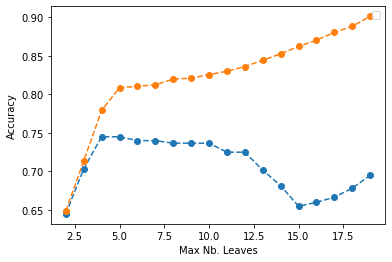

In [109]:
plt.plot(results_df.T.index , results_df.T["test_accuracy"],"o--")
plt.plot(results_df.T.index , results_df.T["train_accuracy"],"o--")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Max Nb. Leaves")

Avec en jaune la courbe du *train accurancy* et en bleu celle du *test accuracy*, un phénomène d'overfitting est visible. Le modèle se fit tellement bien au training set, qu'il n'est plus adéquat pour retrouver le test set. Afin de pouvoir mieux se concentrer et expliquer nos données, on peut prendre un nombre maximal de feuilles entre 4 et 5, car on observe un plateau de l'accuracy à ce niveau là pour le test et le train. Au delà de 5 leaves, l'accuracy du test set fluctue et diminue, ne donnant que peu d'informations supplémentaires. Ces informations seront sûrement peu intéressantes au vu de l'overfitting du modèle. On retrace alors un arbre avec les bons paramètres.

In [110]:
clf2 = DecisionTreeClassifier(random_state=12, max_depth=4)
clf2.fit(X_train, y_train)

y_predict2=clf2.predict(X_test)

accuracy_score(y_test,y_predict)

0.7258064516129032

On trouve une accuracy du modèle 72%. Cette légère diminution pourrait être expliqué par la diminution du nombre de leaves demandé. Ainsi en diminuant considérament le nombre de leaves, l'accuracy n'est pas (peu) touchée, justifiant alors cette diminution engendrant peu de pertes d'informations.  

['Access electricity', 'Agri land', 'Air pollution', 'Renewable energy', 'Rural pop', 'Urban pop growth']


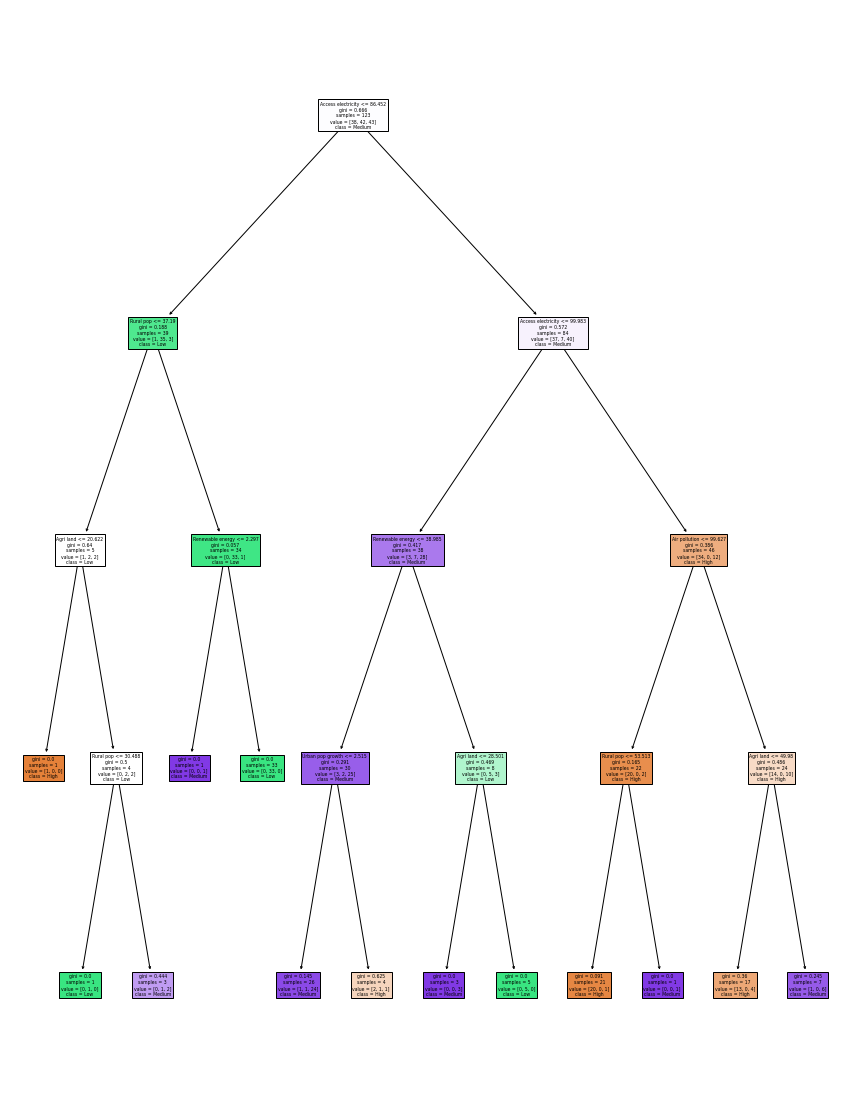

In [111]:
feature_names = list(['Access electricity', 'Agri land', 'Air pollution', 'Renewable energy', 'Rural pop', 'Urban pop growth'])
print(feature_names)

plt.figure(figsize=(15,20))
try:
    from sklearn.tree import plot_tree
    _=plot_tree(clf2,filled=True,class_names=clf2.classes_, feature_names=feature_names)
except ImportError:
    pass

In [112]:
# Pour plus de lisibilité:
from sklearn.tree import export_text
r = export_text(clf2, feature_names=feature_names, )
print(r)

|--- Access electricity <= 86.45
|   |--- Rural pop <= 37.19
|   |   |--- Agri land <= 20.62
|   |   |   |--- class: High
|   |   |--- Agri land >  20.62
|   |   |   |--- Rural pop <= 30.49
|   |   |   |   |--- class: Low
|   |   |   |--- Rural pop >  30.49
|   |   |   |   |--- class: Medium
|   |--- Rural pop >  37.19
|   |   |--- Renewable energy <= 2.30
|   |   |   |--- class: Medium
|   |   |--- Renewable energy >  2.30
|   |   |   |--- class: Low
|--- Access electricity >  86.45
|   |--- Access electricity <= 99.98
|   |   |--- Renewable energy <= 38.98
|   |   |   |--- Urban pop growth <= 2.52
|   |   |   |   |--- class: Medium
|   |   |   |--- Urban pop growth >  2.52
|   |   |   |   |--- class: High
|   |   |--- Renewable energy >  38.98
|   |   |   |--- Agri land <= 28.50
|   |   |   |   |--- class: Medium
|   |   |   |--- Agri land >  28.50
|   |   |   |   |--- class: Low
|   |--- Access electricity >  99.98
|   |   |--- Air pollution <= 99.63
|   |   |   |--- Rural pop <= 53

In [113]:
impVarFirst={"Variable":X.columns,"Importance":clf2.feature_importances_}
print(pds.DataFrame(impVarFirst).sort_values(by="Importance",ascending=False))

                                            Variable  Importance
0            Access to electricity (% of population)    0.634757
1                 Agricultural land (% of land area)    0.136098
3  Renewable energy consumption (% of total final...    0.082110
4           Rural population (% of total population)    0.071118
5                 Urban population growth (annual %)    0.038175
2  PM2.5 air pollution, population exposed to lev...    0.037742


Ce nouvel arbre est plus lisible et compréhensible. En calculant l'important des variables, on observe notamment: 
- que l'accès l'électricité représente le seuil le plus important de séparation (à 86% puis 99%), vient ensuite le pourcentage de terres agricoles et enfin la consommation d'énergie renouvelable. Ces trois paramètres permettent la plus grande partie de la classification. 
- pour un accès à l'electricité supérieur à 99%, en fonction des % populations rurales ou de la pollution de l'air, les pays classifiés ont des émissions de CO2 élévés (ou moyennes). 
- par opposition, si l'accès à l'electricité est inférieur à 86%, on observe que la population rurale et la consommation d'énergie renouvelables entre en jeu et permet la classification notamment à plusieurs niveaux des pays avec des émissions de CO2 faible (ou moyennes). 

Ainsi notre arbre nous donne l'information que les émissions de CO2 sont étroitement liées avec l'accès à l'électricité et la consommation d'énergies renouvelables, 2 facteurs cohérents dans l'utilisation des ressources énergétiques et leurs impacts environnementaux. D'autre part, le pourcentage de terres agricoles et la part de population rurale influent aussi beaucoup sur le taux d'émissions de CO2. Plus un pays a un pourcentage de population rurale important, plus il aurait des émissions de CO2 faibles.

Cette classification est cohérente avec nos conceptions et nos connaissances sur les pays. L'arbre est aussi en adéquation avec le clustering fait ci-dessus. 

**Classification with K nearest neighbors and SVM classifier**

Afin de pouvoir comparer nos résultats obtenu avec un arbre de classification, nous pouvons utiliser plusieurs autres méthodes dont notamment le K-nearest neighbors et le SVM classifiers.

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_validate 

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

knn = KNeighborsClassifier()
scores_knn = cross_validate(knn, X, y, scoring=scoring,cv=cv, return_train_score=True)
scores_knn = pds.DataFrame(scores_knn).mean()

svm = SVC(kernel='linear')
scores_svm = cross_validate(svm, X, y, scoring=scoring,cv=cv, return_train_score=True)
scores_svm = pds.DataFrame(scores_svm).mean()

# En réutilisant le score du tree classifier:
scores_dt=pds.DataFrame(scores_clf).mean()

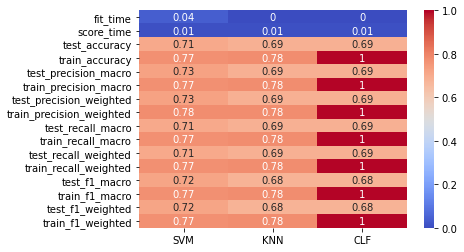

In [115]:
full_scores = pds.DataFrame({"SVM": scores_svm,"KNN":scores_knn , "CLF":scores_dt})
sns.heatmap(full_scores.T.round(2).T,annot=True,cmap='coolwarm')

Les résultats pour ces différentes méthodes sont peu différents de notre arbre de classification, même si on observe une meilleur accuracy pour la méthode SVM. Cependant le modèle utilisé pour l'arbre de décision est celui réduit à 4 feuilles, ce qui induit une réduction des paramètres d'accuracy. En conclusion, notre arbre semble apporter les précisions nécessaires pour notre modèle. 

## Conclusion

Dans notre étude, nous avons pu clusterisés et classifié des pays selon leurs données environnementales. Les résultats trouvés concordent avec nos visions et nos connaissances en matière de géographique économique. Les pays les plus industrialisés sont à la fois de forts pollueurs mais présentent des taux de consommation d'énergie renouvelables assez élevés. Au contraire les pays en développement présentent des accès à l'électricité plus compliqué et des populations rurales plus importantes. 

Toutefois, un regard critique est nécessaire à apporter sur notre jeu de données. Ces dernières ont été prises sur un site web récoltant des indicateurs sur les pays monde entier. Or l'absence de beaucoup de données entrainent des jeux déséquilibrés, de même certains pays sont bien moins renseigné que la moyenne, induisant un biais à prendre en compte dans notre étude.